# Time Series Clustering
### Voltage 23 (-35V)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy as hac

In [2]:
data = pd.read_csv('V23.csv', header=None)
data.shape

(2500, 64)

In [3]:
# glimpse into design matrix
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.001382,0.001283,0.001276,0.001181,0.001042,0.001090,0.001054,0.000977,0.000961,0.000906,...,0.000508,0.000495,0.000491,0.000474,0.000450,0.000484,0.000507,0.000473,0.000465,0.000470
1,0.001365,0.001253,0.001157,0.001152,0.001090,0.001010,0.001010,0.000987,0.000973,0.000949,...,0.000519,0.000525,0.000492,0.000514,0.000522,0.000506,0.000471,0.000516,0.000490,0.000534
2,0.001352,0.001140,0.001172,0.001097,0.001064,0.001031,0.000993,0.001026,0.000990,0.000984,...,0.000617,0.000606,0.000618,0.000587,0.000542,0.000586,0.000541,0.000567,0.000592,0.000533
3,0.001280,0.001171,0.001151,0.001164,0.001065,0.001076,0.001009,0.000976,0.001001,0.000984,...,0.000556,0.000567,0.000574,0.000570,0.000554,0.000541,0.000545,0.000543,0.000535,0.000518
4,0.001258,0.001209,0.001097,0.001103,0.001117,0.000988,0.001026,0.000973,0.000986,0.000936,...,0.000564,0.000579,0.000557,0.000589,0.000563,0.000575,0.000540,0.000553,0.000560,0.000570


Each row is a pixel location from a flattened 50 x 50 image (2500 pixels/rows total) each consisting of a 64 set-interval time series.

In [4]:
# stats per pixel
# remove .head() to see all 2500
data.T.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
0,64.0,0.000699,0.000225,0.000450,0.000527,0.000626,0.000794,0.001382
1,64.0,0.000716,0.000210,0.000471,0.000538,0.000661,0.000854,0.001365
2,64.0,0.000766,0.000181,0.000533,0.000628,0.000730,0.000877,0.001352
3,64.0,0.000757,0.000186,0.000518,0.000620,0.000706,0.000892,0.001280
4,64.0,0.000750,0.000175,0.000540,0.000616,0.000699,0.000864,0.001258


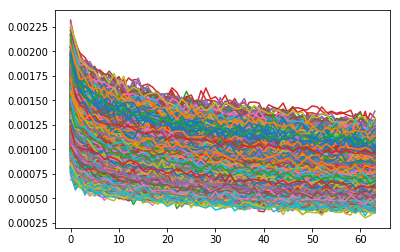

In [5]:
# all of the time series
ax = None
for d in data.values:
    ax = sns.lineplot(ax=ax, data=d)

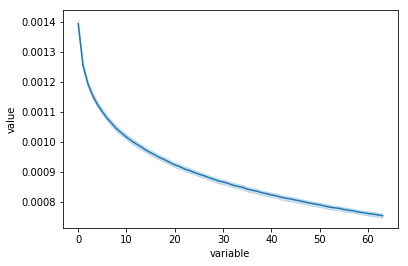

In [6]:
# since all time series show the same functional trend lets plot the average of them all
sns.lineplot(data=data.melt(), x='variable', y='value')

Looks like an exp decay.

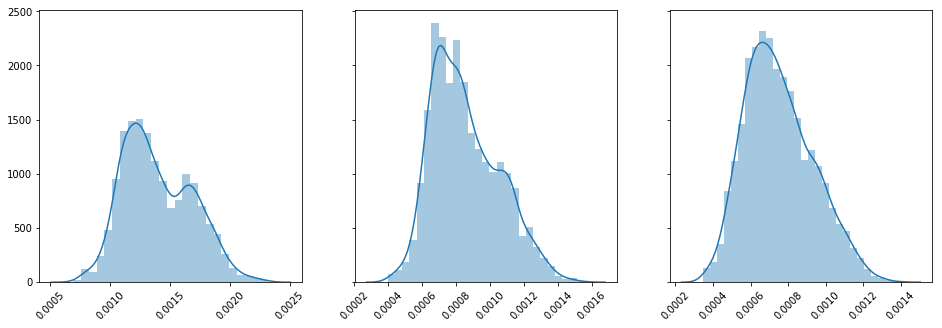

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

# initial (first timestep) time series measure dist of all pixels
sns.distplot(data.iloc[:,0].values, ax=ax1)
# mid time series (33rd timestep) measure dist of all pixels
sns.distplot(data.iloc[:,32].values, ax=ax2)
# final time series (64th timestep) measure dist of all pixels
sns.distplot(data.iloc[:,63].values, ax=ax3)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

fig.set_figheight(5)
fig.set_figwidth(16)

From left to right, we observe the distribution of all pixels for timesteps 1, 33, and 64. It seems that the overall distribution slowly merges from a bimodal to a unimodal over time. Perhaps this is reflecting stabilization and amplitude decay. 

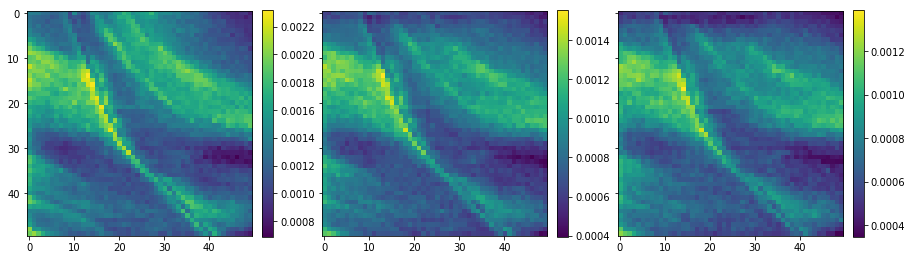

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
im1 = ax1.imshow(data.iloc[:,0].values.reshape([50,50]))
fig.colorbar(im1, fraction=0.046, pad=0.04, ax=ax1)
im2 = ax2.imshow(data.iloc[:,32].values.reshape([50,50]))
fig.colorbar(im2, fraction=0.046, pad=0.04, ax=ax2)
im3 = ax3.imshow(data.iloc[:,63].values.reshape([50,50]))
fig.colorbar(im3, fraction=0.046, pad=0.04, ax=ax3)
fig.set_figheight(15)
fig.set_figwidth(15)

From left to right we see the first, 33rd, and 64th measurement. We can see that the rightmost/final measurement shows more area with lower amplitutde (more blue and less yellow).

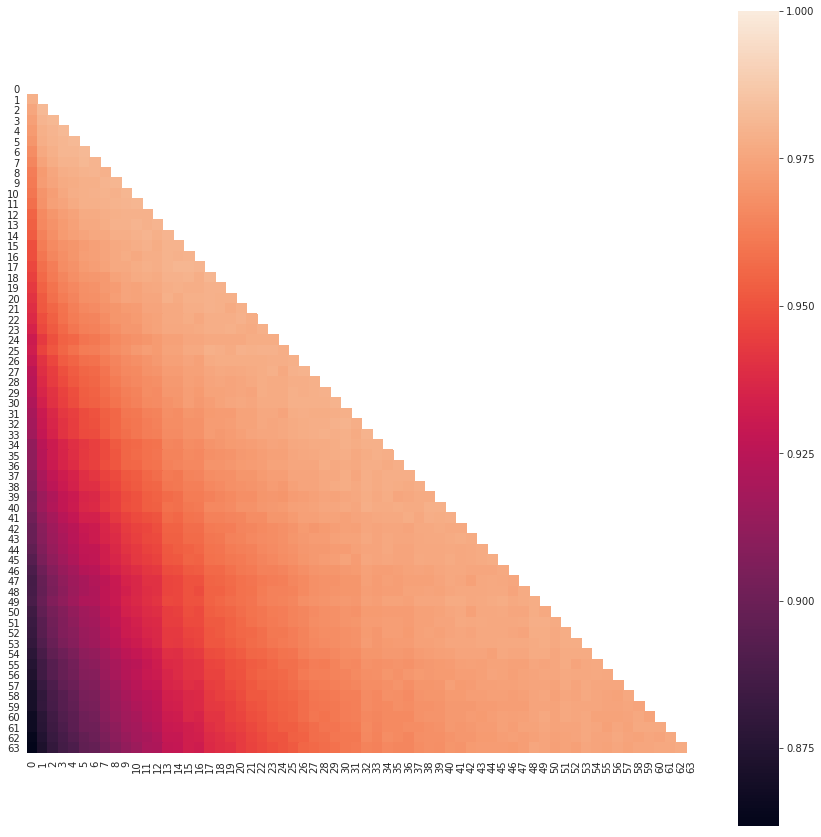

In [9]:
corr = data.corr()

# we only need half of the corr matrix as it is symmetric
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask, square=True)

Note the gradient from left to right in this correlation heatmap. Towards the end of the time series we see stronger correlations for all pixels. This is more support for stabilization.

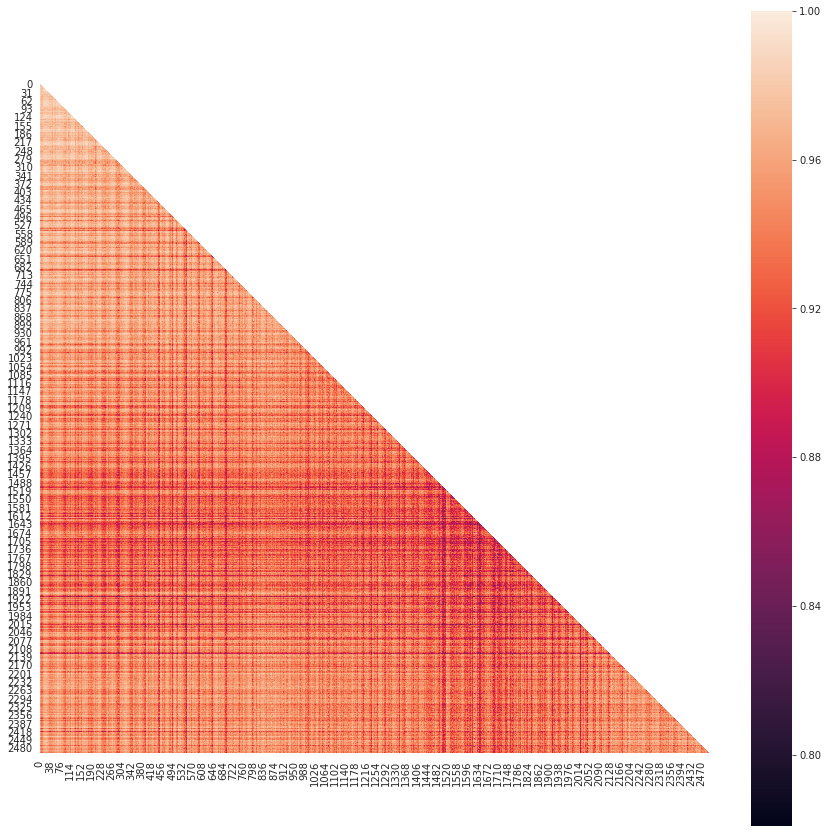

In [10]:
corr = data.T.corr()

# we only need half of the corr matrix as it is symmetric
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask, square=True)

This heatmap shows correlations amongst the time series themselves. Overall, the correlation is very high as the lowest reading is just under 0.8. This is because the dataset shows essentially the same functional behavior for every pixel. There are areas in the triangle where there is slightly less correlation than other areas. Perhaps these are noisier regions. The gird like partitioning of the heatmap shows oscillation between stronger and weaker correlation. This could be attributed to how the pixels behave together when measured.

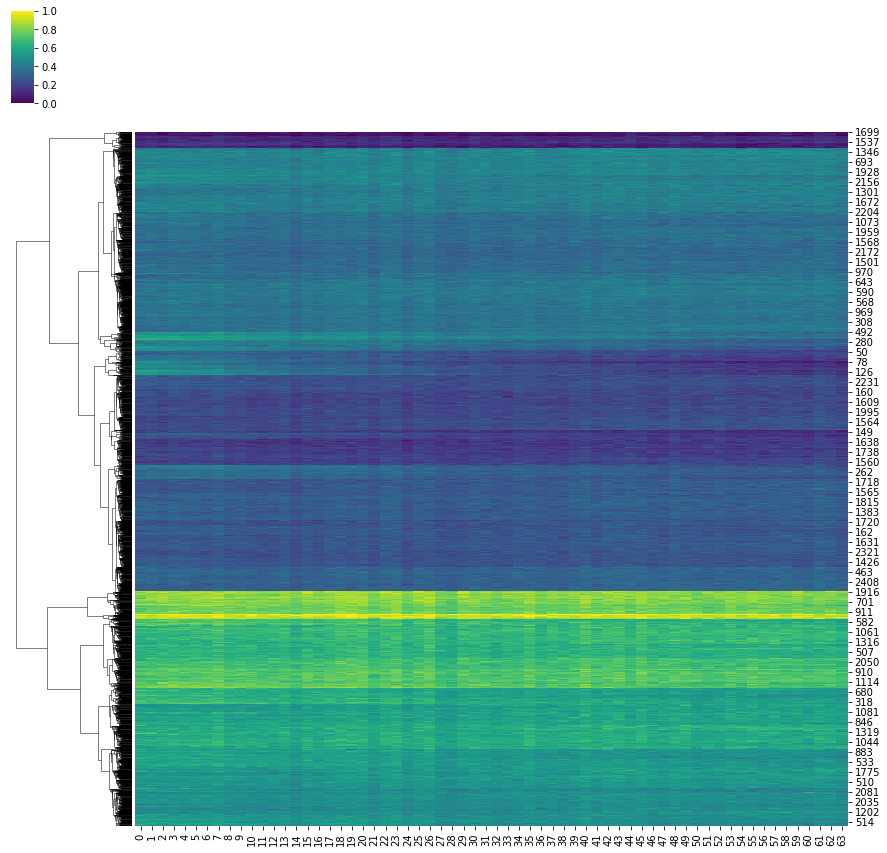

In [11]:
clustergrid = sns.clustermap(data, figsize=(15,15), cmap="viridis", col_cluster=False, standard_scale=1)

In [12]:
clustering = np.array(clustergrid.dendrogram_row.reordered_ind)
split_index = np.where(clustering == 1916)[0][0] + 1
cluster_a = data.iloc[clustering[0:split_index]]
cluster_b = data.iloc[clustering[split_index:]]
print(cluster_a.shape, cluster_b.shape, cluster_a.shape[0] + cluster_b.shape[0] == 2500)

(1657, 64) (843, 64) True


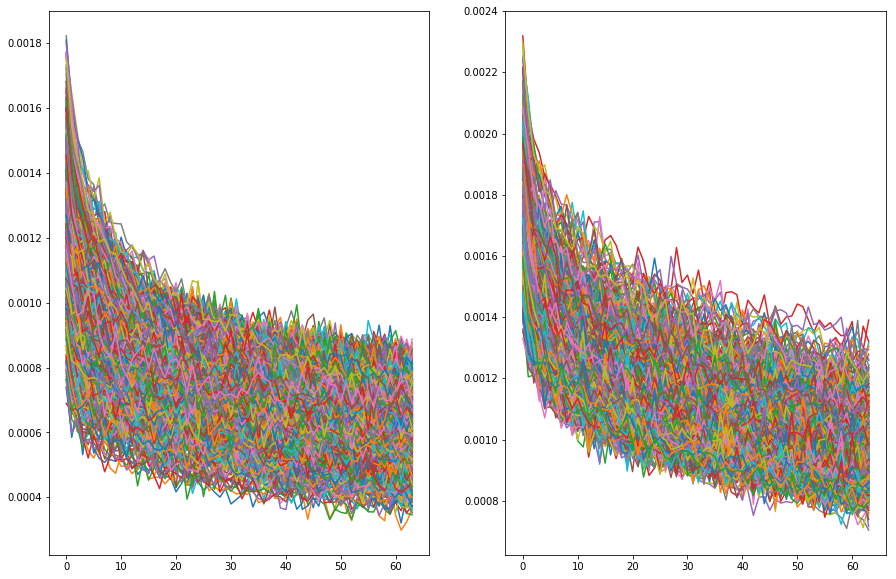

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(15)

# all of the time series
for d in cluster_a.values:
    ax1 = sns.lineplot(ax=ax1, data=d)
    
# all of the time series
for d in cluster_b.values:
    ax2 = sns.lineplot(ax=ax2, data=d)

Plotting the two main clusters. Cluster A on the left and Cluster B on the right. The y-scale is indicative of what partitions the clustering on the highest level. Note the incremented split_index by 1. This was done to manually shift one outlier that may have been incorrectly clustered to Cluster B back into Cluster A. This is typical at the boundries of clustering algorithms or an incorrect eyballing of the split index given the clustering map above.

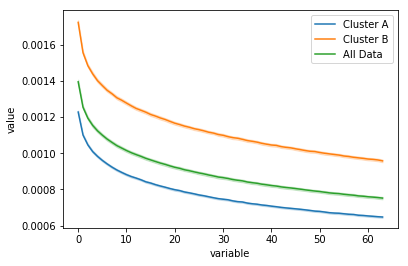

In [14]:
sns.lineplot(data=cluster_a.melt(), x='variable', y='value', label='Cluster A')
sns.lineplot(data=cluster_b.melt(), x='variable', y='value', label='Cluster B')
sns.lineplot(data=data.melt(), x='variable', y='value', label='All Data')

Extracting the two main clusters and plotting their averages against the average of all the data, we observe that Cluster A has an overall lower amplitude while Cluster B has an overall higher amplitude.

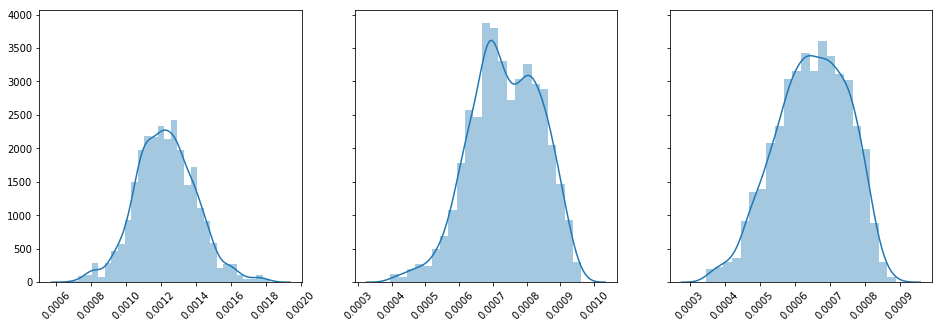

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

# initial (first timestep) time series measure dist of all pixels
sns.distplot(cluster_a.iloc[:,0].values, ax=ax1)
# mid time series (33rd timestep) measure dist of all pixels
sns.distplot(cluster_a.iloc[:,32].values, ax=ax2)
# final time series (64th timestep) measure dist of all pixels
sns.distplot(cluster_a.iloc[:,63].values, ax=ax3)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

fig.set_figheight(5)
fig.set_figwidth(16)

Cluster A shows more or less a normal distribution for all pixels of Cluster A for the 1st, 33rd, and 64th timesteps. The 33rd shows evidence two peaks.

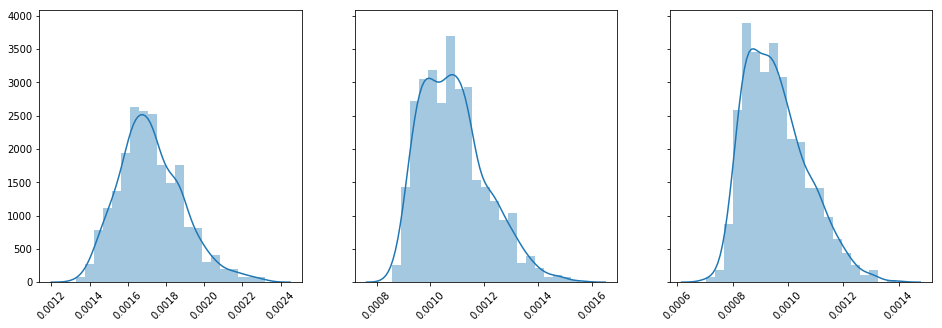

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

# initial (first timestep) time series measure dist of all pixels
sns.distplot(cluster_b.iloc[:,0].values, ax=ax1)
# mid time series (33rd timestep) measure dist of all pixels
sns.distplot(cluster_b.iloc[:,32].values, ax=ax2)
# final time series (64th timestep) measure dist of all pixels
sns.distplot(cluster_b.iloc[:,63].values, ax=ax3)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

fig.set_figheight(5)
fig.set_figwidth(16)

Cluster B shows more or less a normal distribution for all pixels of Cluster B for the 1st, 33rd, and 64th timesteps. The 33rd shows evidence two peaks.

In [17]:
cluster_a.insert(0, 'marker', 0.)
cluster_b.insert(0, 'marker', 1.)
merged_clusters = pd.concat([cluster_a, cluster_b]).sort_index()
print(merged_clusters.shape, '65 cols as one has been added to track cluster identity')

(2500, 65) 65 cols as one has been added to track cluster identity


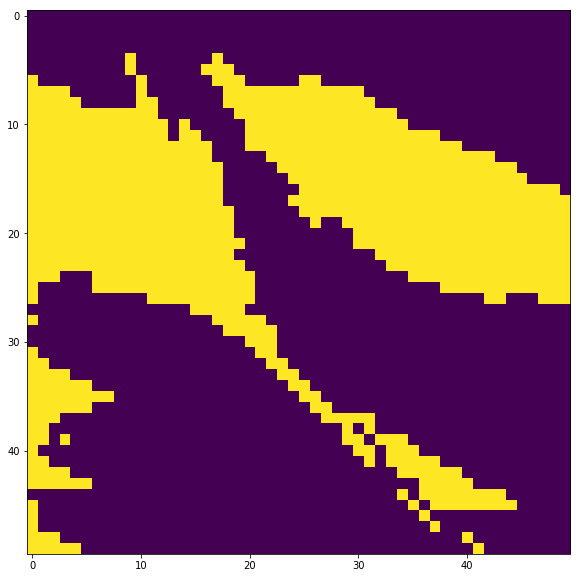

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(merged_clusters.iloc[:,0].values.reshape([50,50]))

This image shows the two clusters that have been identified. Cluster A is the brighter color while Cluster B is the darker color. Comparing this bit map to the first, 33rd, and 64th image maps above, we can see the pixels that show higher amplitudes as found by the hierarchical clustering for this voltage bias are fairly consistent.